In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, recall_score, f1_score, precision_recall_fscore_support

In [ ]:
from google.colab import drive
from os import listdir,chdir
drive.mount('/content/drive/')
chdir('/content/drive/MyDrive/Proyecto Integrador/Version 3')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%time datos = pd.read_csv('data_equilibrada.csv')

CPU times: user 376 ms, sys: 35.2 ms, total: 412 ms
Wall time: 223 ms


In [ ]:
datos.shape

(10532, 3)

In [ ]:
%time datos.tokens=datos.tokens.apply(literal_eval)

CPU times: user 7.98 s, sys: 75.3 ms, total: 8.05 s
Wall time: 4.16 s


In [ ]:
bow = pd.read_csv('bow.csv')

In [ ]:
%time tfidf=pd.DataFrame(TfidfVectorizer(vocabulary=bow.token.values).fit_transform(datos['tokens'].str.join(" ")).toarray(), columns=bow.token.values)

CPU times: user 3.13 s, sys: 37.1 ms, total: 3.17 s
Wall time: 1.65 s


In [ ]:
tfidf

,info,make,requir,inc,date,immedi,account,voltag,compani,fax,confirm,dunde,process,recipi,arbor,zgi,holcim,addit,home,support,provid,delet,encrypt,chang,sourc,industri,work,offic,want,ssn,imag,mylif,get,research,qti,know,view,form,resolut,hello,...,even,rout,audit,wednesday,confer,remind,act,swr,section,mortgag,beam,differ,atlant,qualiti,point,happen,invit,handl,import,recent,found,vega,histori,chicago,financi,fiori,leav,vylnbsyxrmb,seminar,depend,wed,none,test,thursday,step,inquiri,reserv,appli,futur,mqvoxdsxwki
0,0.222675,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.219218,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.236632,0.229117,0.0,0.0,0.2513,0.228164,0.0,0.000000,0.0,0.0,0.227667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.076446,0.079665,0.0,0.000000,0.081513,0.000000,0.0,0.0,0.176793,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.079950,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.083243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.147944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.124332,0.0,0.0,0.0,0.0,0.000000,0.373933,0.0,0.000000,0.000000,0.131083,0.0,0.0,0.000000,0.0,0.0,0.0,0.122401,0.0,0.0,0.000000,0.000000,0.0,0.138164,0.0,0.000000,0.0,0.0,0.000000,0.127929,0.0,0.0,0.0000,0.000000,0.0,0.136046,0.0,0.0,0.127119,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,0.406349,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.214207,0.0,0.0,0.000000,0.0,0.0,0.0,0.200019,0.0,0.0,0.213077,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.215909,0.209052,0.0,0.0,0.0000,0.208182,0.0,0.000000,0.0,0.0,0.207729,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10528,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10529,0.000000,0.0,0.0,0.0,0.0,0.207926,0.000000,0.0,0.228613,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.217457,0.0,0.000000,0.0,0.501412,0.0,0.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    tfidf.values, datos.etiquetas.values, test_size=0.2, random_state=42)

In [ ]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
# l1_ratios=[i/10 for i in range(0,11)]
l1_ratios=np.arange(0,1.05,0.05)
for l1_ratio in l1_ratios:
    print("l1_ratio:",l1_ratio)
    logreg = LogisticRegression(l1_ratio=l1_ratio,penalty='elasticnet',max_iter=1000,solver='saga',multi_class='multinomial',n_jobs=-1)
    logreg.fit(X_train, y_train)

    predicciones_train=logreg.predict(X_train)
    predicciones_test=logreg.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))

    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

l1_ratio: 0.0
Train:
[[1892   10   45  167  125]
 [  39 1447  209   11    7]
 [ 187   85 1233   49   60]
 [ 226    4   37 1157  117]
 [ 147    5   13  209  944]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      2239
           1       0.93      0.84      0.89      1713
           2       0.80      0.76      0.78      1614
           3       0.73      0.75      0.74      1541
           4       0.75      0.72      0.73      1318

    accuracy                           0.79      8425
   macro avg       0.79      0.78      0.79      8425
weighted avg       0.80      0.79      0.79      8425

Test:
[[442   6  15  51  33]
 [  7 385  59   4   0]
 [ 46  27 290  14  20]
 [ 71   1  14 272  31]
 [ 34   1   5  60 219]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       547
           1       0.92      0.85      0.88       455
           2       0.76      0.73      0.74       397
          

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


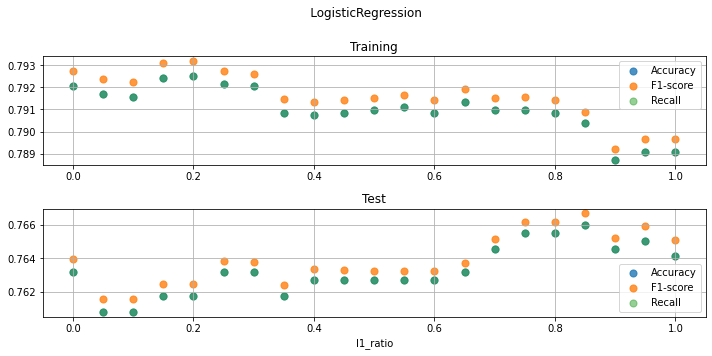

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     LogisticRegression")

ax[0].scatter(l1_ratios,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(l1_ratios,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(l1_ratios,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')

ax[1].scatter(l1_ratios,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(l1_ratios,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(l1_ratios,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('l1_ratio')

plt.show()

In [ ]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
# l1_ratios=[i/10 for i in range(0,11)]
Cs=np.arange(1,11)
for C in Cs:
    print("C:",C)
    logreg = LogisticRegression(C=C,l1_ratio=0.85,penalty='elasticnet',max_iter=1000,solver='saga',multi_class='multinomial',n_jobs=-1)
    logreg.fit(X_train, y_train)

    predicciones_train=logreg.predict(X_train)
    predicciones_test=logreg.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))

    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

C: 1
Train:
[[1891   13   41  170  124]
 [  31 1449  215   11    7]
 [ 187   95 1227   50   55]
 [ 229   10   36 1145  121]
 [ 144    4   16  207  947]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      2239
           1       0.92      0.85      0.88      1713
           2       0.80      0.76      0.78      1614
           3       0.72      0.74      0.73      1541
           4       0.76      0.72      0.74      1318

    accuracy                           0.79      8425
   macro avg       0.79      0.78      0.79      8425
weighted avg       0.79      0.79      0.79      8425

Test:
[[447   5  15  52  28]
 [  8 386  57   4   0]
 [ 43  28 290  13  23]
 [ 71   1  13 272  32]
 [ 34   1   5  60 219]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       547
           1       0.92      0.85      0.88       455
           2       0.76      0.73      0.75       397
           3       

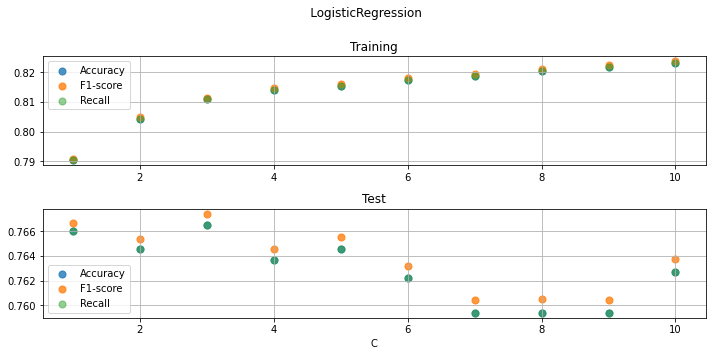

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     LogisticRegression")

ax[0].scatter(Cs,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(Cs,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(Cs,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')

ax[1].scatter(Cs,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(Cs,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(Cs,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('C')

plt.show()

In [ ]:
cms_train=[]
cms_test=[]
scores_train = []
scores_test = []
knn = LogisticRegression(penalty='none',max_iter=12000,solver='saga',multi_class='multinomial',n_jobs=-1)
knn.fit(X_train, y_train)

predicciones_train=knn.predict(X_train)
predicciones_test=knn.predict(X_test)

print("Train:")
print(confusion_matrix(y_train,predicciones_train))
print(classification_report(y_train,predicciones_train))

print("Test:")
print(confusion_matrix(y_test,predicciones_test))
print(classification_report(y_test,predicciones_test))

Train:
[[1963    2   54  120  100]
 [   6 1530  175    1    1]
 [ 102   37 1406   31   38]
 [ 206    0   30 1169  136]
 [  74    0   21  146 1077]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      2239
           1       0.98      0.89      0.93      1713
           2       0.83      0.87      0.85      1614
           3       0.80      0.76      0.78      1541
           4       0.80      0.82      0.81      1318

    accuracy                           0.85      8425
   macro avg       0.85      0.84      0.84      8425
weighted avg       0.85      0.85      0.85      8425

Test:
[[431  15  18  45  38]
 [  9 365  74   5   2]
 [ 29  21 314  13  20]
 [ 75   3  14 254  43]
 [ 22   4  11  45 237]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       547
           1       0.89      0.80      0.85       455
           2       0.73      0.79      0.76       397
           3       0.70 